In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('salaries[1].csv')

In [3]:
# Preview the data
print("Dataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Dataset Head:
  company                  job     degree  salary_more_then_100k
0  google      sales executive  bachelors                      0
1  google      sales executive    masters                      0
2  google     business manager  bachelors                      1
3  google     business manager    masters                      1
4  google  computer programmer  bachelors                      0

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes
None


In [4]:
label_encoders = {}
for column in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
print(df.head())

   company  job  degree  salary_more_then_100k
0        2    2       0                      0
1        2    2       1                      0
2        2    0       0                      1
3        2    0       1                      1
4        2    1       0                      0


In [6]:
# Define features and target
X = df.drop('salary_more_then_100k', axis=1)  
y = df['salary_more_then_100k']

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train the Random Forest model
model = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [9]:
# Make predictions
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"\nAccuracy Score: {accuracy_score(y_test, y_pred):.2f}")


Confusion Matrix:
[[0 2]
 [0 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.50      1.00      0.67         2

    accuracy                           0.50         4
   macro avg       0.25      0.50      0.33         4
weighted avg       0.25      0.50      0.33         4


Accuracy Score: 0.50


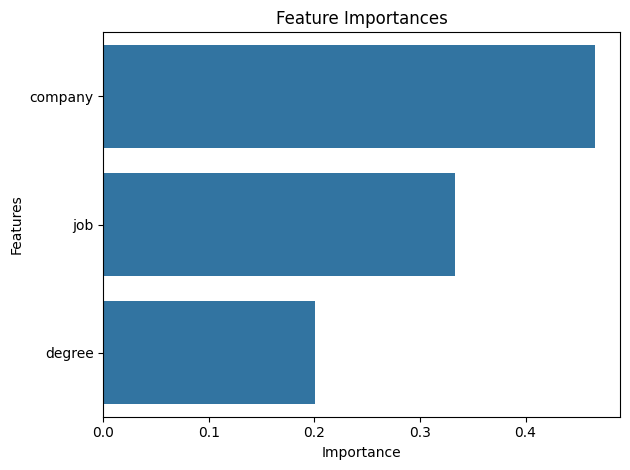

In [11]:
# Feature importance visualization
importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()